In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
X_train = np.loadtxt('train_X.csv', delimiter=',').T
Y_train = np.loadtxt('train_Y.csv', delimiter=',').T

X_test = np.loadtxt('test_X.csv', delimiter=',').T
Y_test = np.loadtxt('test_Y.csv', delimiter=',').T

X_train = X_train/255.0
X_test  = X_test/255.0


In [3]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(784, 1000)
(10, 1000)
(784, 350)
(10, 350)


974


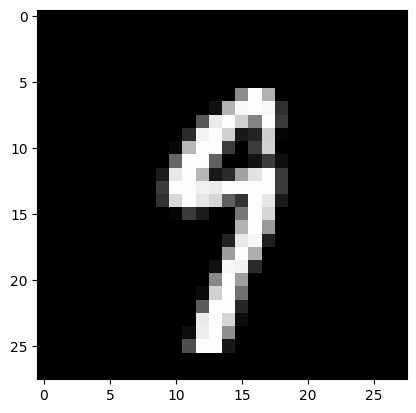

In [4]:
index = random.randint(0,X_train.shape[1])
print(index)
plt.imshow(X_train[:, index].reshape(28,28), cmap = 'gray')
plt.show()

In [5]:
def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)

def deriv_tanh(x):  
    return (1 - np.power(np.tanh(x), 2))

def relu(x):
    return np.maximum(x, 0)

def deriv_relu(x):
    return np.array(x > 0, dtype = np.float32)

In [6]:
def initialize_weights_and_biases(num_input_nodes, num_hidden_nodes, num_output_nodes):
    
    W1 = np.random.randn(num_hidden_nodes, num_input_nodes)*0.001
    B1 = np.zeros((num_hidden_nodes, 1))

    W2 = np.random.randn(num_output_nodes, num_hidden_nodes)*0.001
    B2 = np.zeros((num_output_nodes, 1))

    weights_and_biases = {
        'W1': W1, 
        'B1': B1, 
        'W2': W2, 
        'B2': B2
    }

    return weights_and_biases

In [7]:
def forward_propagation(input, weights_and_biases):
    x = input
    W1 = weights_and_biases['W1']
    B1 = weights_and_biases['B1']
    W2 = weights_and_biases['W2']
    B2 = weights_and_biases['B2']

    # Dot product operator in python is '@'
    Z1 = W1 @ x + B1
    A1 = relu(Z1)

    Z2 = W2 @ A1 + B2
    A2 = softmax(Z2)

    prediction_dict = {
        'Z1': Z1, 
        'A1': A1,
        'Z2': Z2,
        'A2': A2,
    }

    return prediction_dict

In [8]:
def cost_function(A2, y):
    # Batch size: m
    m = y.shape[1]

    cost = -(1/m)*np.sum(y*np.log(A2))

    return cost

In [9]:
def back_propagation(x, y, weights_and_biases, prediction_dict):
    W2 = weights_and_biases['W2']

    A1 = prediction_dict['A1']
    Z1 = prediction_dict['Z1']
    A2 = prediction_dict['A2']

    m = x.shape[1]

    dZ2 = A2 - y
    dW2 = (1/m)*(dZ2 @ A1.T)
    dB2 = (1/m)*np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = W2.T @ dZ2 * deriv_relu(Z1)
    dW1 = (1/m)*dZ1 @ x.T
    dB1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)

    gradients_dict = {
        'dW1': dW1,
        'dB1': dB1,
        'dW2': dW2,
        'dB2': dB2,
    }

    return gradients_dict
    

In [10]:
def update_weights_and_biases(weights_and_biases, gradients_dict, learning_rate):
    W1 = weights_and_biases['W1']
    B1 = weights_and_biases['B1']
    W2 = weights_and_biases['W2']
    B2 = weights_and_biases['B2']

    dW1 = gradients_dict['dW1']
    dB1 = gradients_dict['dB1']
    dW2 = gradients_dict['dW2']
    dB2 = gradients_dict['dB2']

    a = learning_rate

    W1 = W1 - a*dW1
    B1 = B1 - a*dB1
    W2 = W2 - a*dW2
    B2 = B2 - a*dB2

    weights_and_biases = {
    'W1': W1, 
    'B1': B1, 
    'W2': W2, 
    'B2': B2
    }

    return weights_and_biases



In [11]:
def train_model(x_train, y_train, num_hidden_nodes, learning_rate, epochs, batch_size):
    
    num_input_nodes = x_train.shape[0]
    num_output_nodes = y_train.shape[0]
    
    weights_and_biases = initialize_weights_and_biases(num_input_nodes, num_hidden_nodes, num_output_nodes)

    costList = []

    x_train = x_train.reshape(x_train.shape[0], batch_size, -1)
    y_train = y_train.reshape(y_train.shape[0], batch_size, -1)
    print(x_train.shape)

    iterations = x_train.shape[2]

    for j in range(epochs):
        for i in range(iterations):
            x = x_train[:,:,i]
            y = y_train[:,:,i]

            prediction = forward_propagation(x, weights_and_biases)
            A2 = prediction['A2']

            cost = cost_function(A2, y)

            gradients = back_propagation(x, y, weights_and_biases, prediction)

            weights_and_biases = update_weights_and_biases(weights_and_biases, gradients, learning_rate)


            if i % 1000 == 0:
                print('i =', i, 'cost =', cost)
                costList.append(cost)

    return weights_and_biases, costList


In [12]:
epochs = 50
num_hidden_nodes = 1000
learning_rate = 0.02
batch_size = 1
trained_weights_and_biases, costList = train_model(X_train, Y_train, num_hidden_nodes, learning_rate, epochs, batch_size = batch_size)

(784, 1, 1000)


i = 0 cost = 2.302530099808182
i = 0 cost = 10.834891880979665
i = 0 cost = 6.847228589801896
i = 0 cost = 4.693037163025665
i = 0 cost = 3.8890041080391353
i = 0 cost = 2.909956800147048
i = 0 cost = 1.9761931791648921
i = 0 cost = 1.2223915686741542
i = 0 cost = 0.6096587101618434
i = 0 cost = 0.33749376481566923
i = 0 cost = 0.3311244480669713
i = 0 cost = 0.3315469423337076
i = 0 cost = 0.1711496213016306
i = 0 cost = 0.30704809690152346
i = 0 cost = 0.05232623608288158
i = 0 cost = 0.022998506951327588
i = 0 cost = 0.07898005544745793
i = 0 cost = 0.36017090088757114
i = 0 cost = 0.036502472237326174
i = 0 cost = 0.014432138865768744
i = 0 cost = 0.008345841361445384
i = 0 cost = 0.004427963229414081
i = 0 cost = 0.00304379475615399
i = 0 cost = 0.0034615181308404186
i = 0 cost = 0.0007554561155419205
i = 0 cost = 0.00011671633627386083
i = 0 cost = 0.0001351364498850188
i = 0 cost = 0.00018312368550526726
i = 0 cost = 0.000149180771977545
i = 0 cost = 3.292369811545593e-05
i = 0 

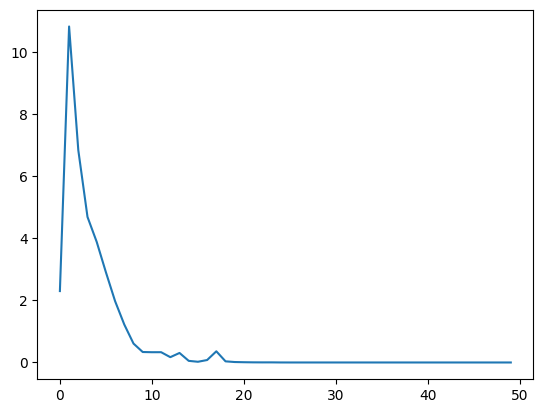

In [13]:
t = np.arange(0, len(costList))
plt.plot(t, costList)
plt.show()

In [14]:
def measureAccuracy(input, labels, weights_and_biases):
    prediction_dict = forward_propagation(input, weights_and_biases) 
    A2 = prediction_dict['A2']
    A2_max_index = np.argmax(A2, 0)
    label = np.argmax(labels, 0)

    accuracy = np.mean(A2_max_index == label)*100

    return(accuracy)

In [15]:
print("Training Accuracy", measureAccuracy(X_train, Y_train, trained_weights_and_biases))
print("Testing Accuracy", measureAccuracy(X_test, Y_test, trained_weights_and_biases))

Training Accuracy 94.5
Testing Accuracy 80.28571428571428
